<a href="https://colab.research.google.com/github/gorzanskik-ai/machine-learning/blob/main/supervised-learning/02_regression/06_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sklearn.__version__

'1.0.2'

Generacja danych

[]

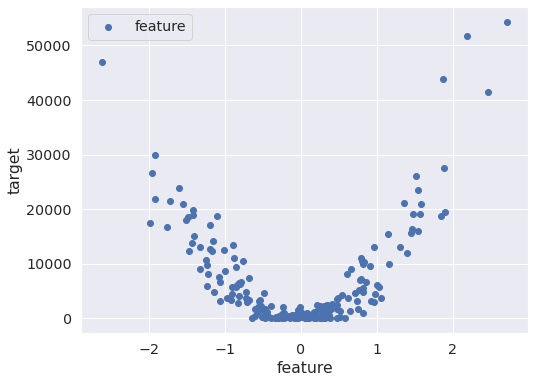

In [24]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1, noise=20)
y = y ** 2

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='feature')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.plot()

Regresja liniowa

[]

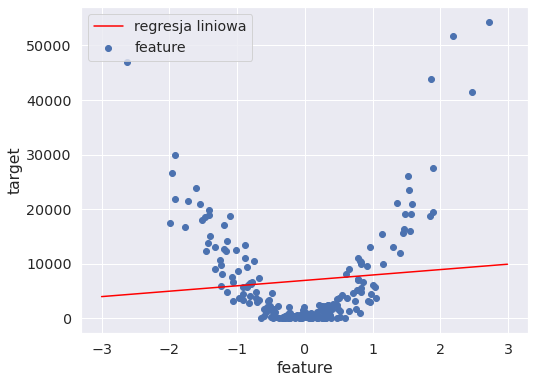

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

plot_data = np.arange(-3, 3, 0.01).reshape(-1, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='feature')
plt.plot(plot_data, lr.predict(plot_data), label='regresja liniowa', color='red')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.plot()

Regresja drzew decyzyjnych

[]

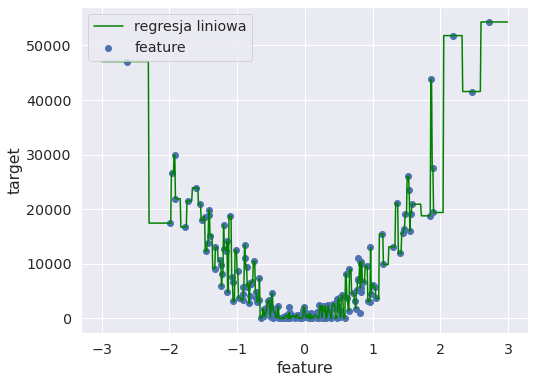

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()  #bez ustalenia hiperparametrów drzewo dopasuje się aż do ostatniego podziału
tree.fit(X, y)
y_pred_tree = tree.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='feature')
plt.plot(plot_data, tree.predict(plot_data), label='regresja liniowa', color='green')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.plot()

[]

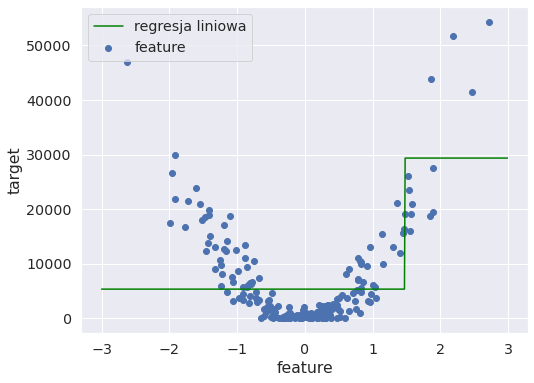

In [36]:
#ustawienie parametru max_depth
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X, y)
y_pred_tree = tree.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='feature')
plt.plot(plot_data, tree.predict(plot_data), label='regresja liniowa', color='green')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.plot()

[]

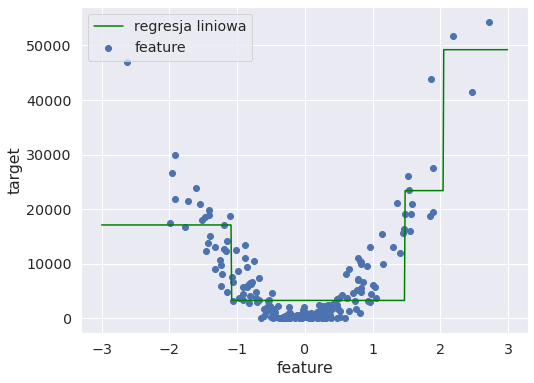

In [47]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)
y_pred_tree = tree.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='feature')
plt.plot(plot_data, tree.predict(plot_data), label='regresja liniowa', color='green')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.plot()

Graf drzewa decyzyjnego

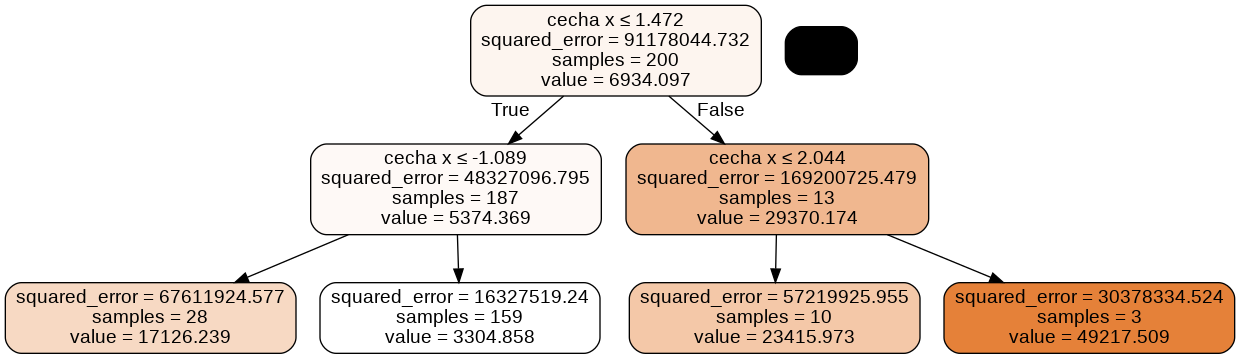

In [48]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=['cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(graph.create_png(), width=600)

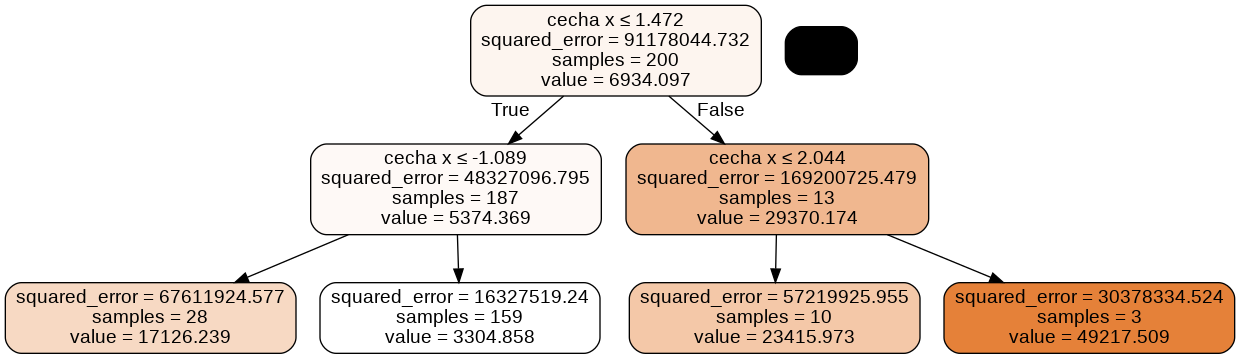

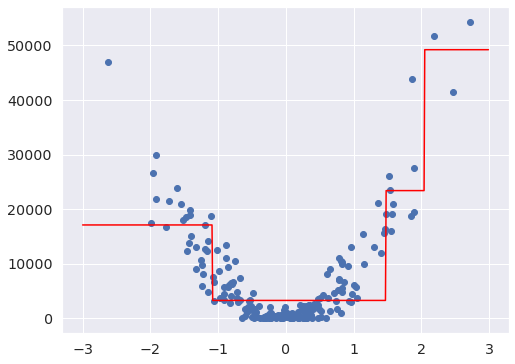

In [56]:
def make_dt_regression(max_depth=2):
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(X, y)

    plt.figure(figsize=(8, 6))
    plt.plot(plot_data, regressor.predict(plot_data), c='red')
    plt.scatter(X, y)

    dot_data = StringIO()
    export_graphviz(regressor, out_file=dot_data,
                   filled=True, rounded=True,
                   special_characters=True,
                   feature_names=['cecha x'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    return Image(graph.create_png(), width=300 + max_depth * 100, height=25 + max_depth * 100)
    
make_dt_regression(max_depth=2)  

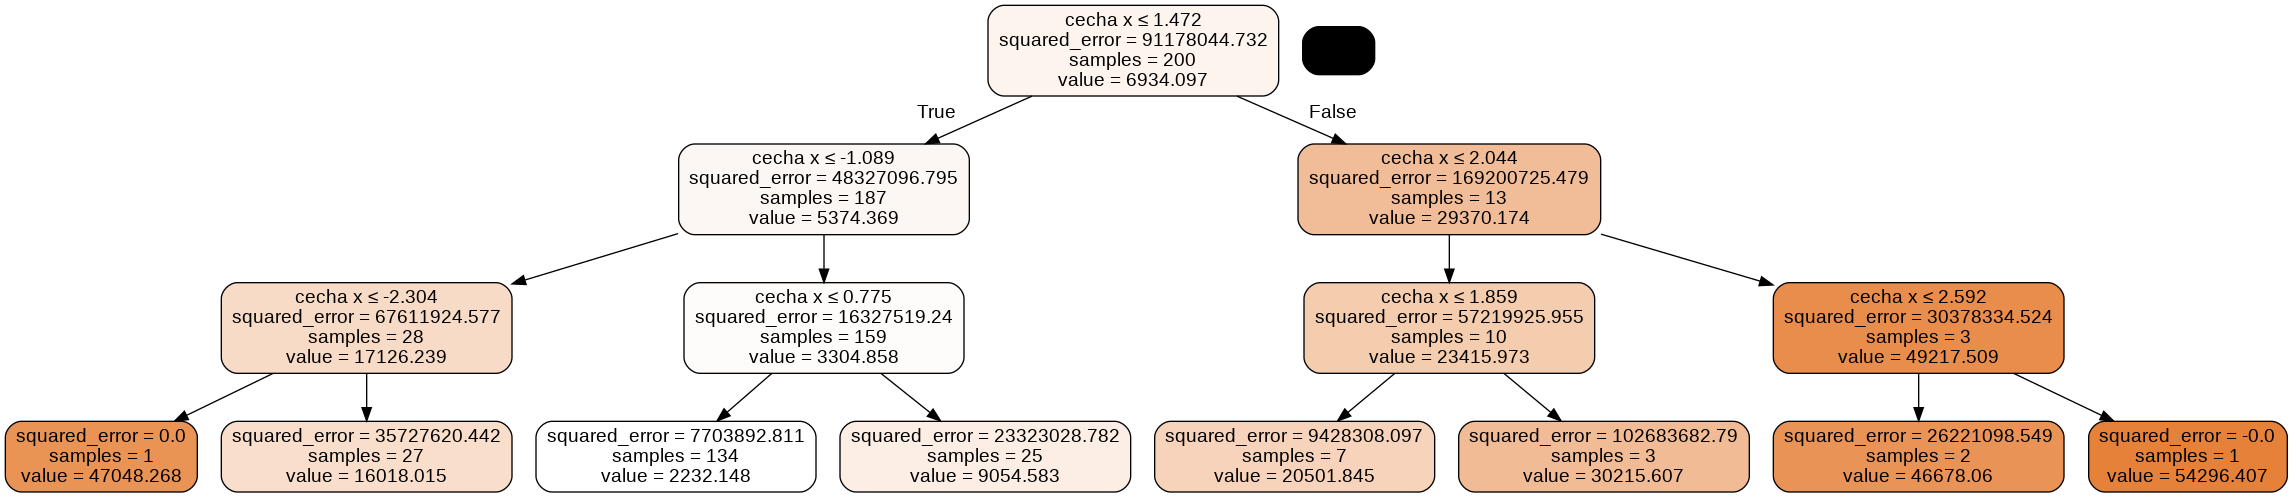

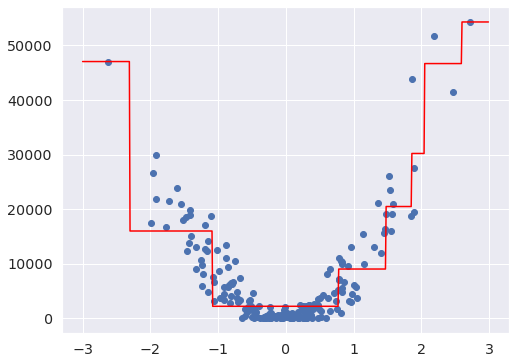

In [57]:
make_dt_regression(max_depth=3)  